In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__) # 1.4.1
%matplotlib inline

1.4.0


In [2]:
from utils import load_mnist_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_mnist_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import network, train, utils
from layers import ReluLayer, TernaryFullyConnectedLayer, BatchNormLayer


In [4]:
# Build bnn
nn = network.NeuralNetwork(in_size=[None, 784], n_out_classes=10,
                           loss_func=utils.smooth_hinge_loss)

In [5]:
nn.reset_graph()

In [6]:
nn = network.NeuralNetwork(in_size=[None, 784], n_out_classes=10,
                           loss_func=tf.losses.softmax_cross_entropy)

nn.reset_graph()

# Hidden FC-1
nn.add_layer(TernaryFullyConnectedLayer(out_dim=2048))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden FC-2
nn.add_layer(TernaryFullyConnectedLayer(out_dim=2048))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden FC-3
nn.add_layer(TernaryFullyConnectedLayer(out_dim=2048))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Output SVM layer (linear part)
nn.add_layer(TernaryFullyConnectedLayer(out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

# Optimizer

In [7]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [8]:
# hyper-parameters
opt.set_rho(0.25)
opt.set_ema_rates(0.999)

In [9]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []
sparsity_fracs = []

n_epochs = 250

for t in range(n_epochs):
    print('Epoch: ', t)
    opt.train_epoch(batch_size=100, ema_decay=0.95, n_output=10, verbose=True)

    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    sparsity_fracs.append(utils.get_sparsity_frac(nn, opt))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)
sparsity_fracs = np.asarray(sparsity_fracs)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99900001, 0.99900001, 0.99900001, 0.99900001]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 1.582428, 0.62
Iter: 55 of 550 || Estimated train loss/acc: 1.287151, 0.75
Iter: 110 of 550 || Estimated train loss/acc: 1.120950, 0.86
Iter: 165 of 550 || Estimated train loss/acc: 1.009675, 0.95
Iter: 220 of 550 || Estimated train loss/acc: 0.934091, 0.90
Iter: 275 of 550 || Estimated train loss/acc: 0.809807, 0.95
Iter: 330 of 550 || Estimated train loss/acc: 0.783887, 0.94
Iter: 385 of 550 || Estimated train loss/acc: 0.666813, 0.97
Iter: 440 of 550 || Estimated train loss/acc: 0.638369, 0.94
Iter: 495 of 550 || Estimated train loss/acc: 0.547599, 0.97
Sparsity fraction (ratio of non-zero weights):  0.857460954532
Train loss/acc:  (0.46810415311293169, 0.97625455812974404) Test loss/acc:  (0.47499791502952576, 0.97310000419616705)
Epoch:  1
========= Begin epoch =========
batch_size = 100
EMA

Sparsity fraction (ratio of non-zero weights):  0.0917490207467
Train loss/acc:  (0.04554066332903775, 0.98994546413421636) Test loss/acc:  (0.079007032811641689, 0.97900000572204593)
Epoch:  9
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99936974, 0.99936974, 0.99936974, 0.99936974]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.068040, 0.99
Iter: 55 of 550 || Estimated train loss/acc: 0.045401, 0.99
Iter: 110 of 550 || Estimated train loss/acc: 0.023696, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.022224, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.032010, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.047574, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.018402, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.020796, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.071032, 0.98
Iter: 495 of 550 || Estimated train loss/acc: 0.025385, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0916618563

Iter: 330 of 550 || Estimated train loss/acc: 0.007954, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.024650, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.009233, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.075131, 0.98
Sparsity fraction (ratio of non-zero weights):  0.0834444662965
Train loss/acc:  (0.022271735024723141, 0.99434545993804935) Test loss/acc:  (0.065316465273499491, 0.98090001344680788)
Epoch:  18
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99960279, 0.99960279, 0.99960279, 0.99960279]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.006817, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.004575, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.059162, 0.99
Iter: 165 of 550 || Estimated train loss/acc: 0.009317, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.012496, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.016923, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.014522, 1.

Iter: 110 of 550 || Estimated train loss/acc: 0.021505, 0.99
Iter: 165 of 550 || Estimated train loss/acc: 0.002268, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.003035, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.013261, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.011288, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.005272, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.019041, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.003792, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0732727583886
Train loss/acc:  (0.0083388059958815573, 0.9979454565048218) Test loss/acc:  (0.059870330635458234, 0.98290000915527342)
Epoch:  27
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99974972, 0.99974972, 0.99974972, 0.99974972]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.002783, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.015652, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.012493, 1.

Iter: 55 of 550 || Estimated train loss/acc: 0.003893, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.002400, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.005172, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.006863, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.001138, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.005661, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.006645, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.003562, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.004369, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0584910104968
Train loss/acc:  (0.0036494931070642036, 0.99914545536041255) Test loss/acc:  (0.055257746968418363, 0.9839000153541565)
Epoch:  36
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99984223, 0.99984223, 0.99984223, 0.99984223]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.002098, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.003429, 1.0

Iter: 55 of 550 || Estimated train loss/acc: 0.001927, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.001721, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000711, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.001897, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.001910, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.002733, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000512, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000397, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.002071, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0462401221977
Train loss/acc:  (0.0011831631964411247, 0.99978181838989255) Test loss/acc:  (0.052461523988749835, 0.98670001029968257)
Epoch:  45
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99990052, 0.99990052, 0.99990052, 0.99990052]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.001304, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.003200, 1.

Iter: 55 of 550 || Estimated train loss/acc: 0.001266, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000520, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000414, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.003494, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000914, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.001525, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000690, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000355, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.002438, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0333698080827
Train loss/acc:  (0.0021736494315237821, 0.99947272777557372) Test loss/acc:  (0.056946212742477659, 0.98490001440048214)
Epoch:  54
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99993724, 0.99993724, 0.99993724, 0.99993724]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.001435, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.001369, 1.

Iter: 55 of 550 || Estimated train loss/acc: 0.000263, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000740, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000117, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000119, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000069, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.001689, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.001522, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.001527, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000305, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0317147812891
Train loss/acc:  (0.00016802006787408819, 1.0) Test loss/acc:  (0.04829043262347113, 0.98810001134872438)
Epoch:  63
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99996054, 0.99996054, 0.99996054, 0.99996054]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000909, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000396, 1.00
Iter: 110 of 

Iter: 55 of 550 || Estimated train loss/acc: 0.000583, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.001681, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000068, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000272, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000124, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000795, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000148, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000186, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000188, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0287808112234
Train loss/acc:  (0.00013293570874586954, 0.99996363639831543) Test loss/acc:  (0.052180439198855309, 0.9886000108718872)
Epoch:  72
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99997509, 0.99997509, 0.99997509, 0.99997509]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.001081, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000026, 1.

Iter: 55 of 550 || Estimated train loss/acc: 0.000100, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000021, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000098, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.001464, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000036, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000167, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000039, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000129, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000014, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0256918600407
Train loss/acc:  (2.592891766901382e-05, 1.0) Test loss/acc:  (0.054414472683565689, 0.98830001115798949)
Epoch:  81
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99998432, 0.99998432, 0.99998432, 0.99998432]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000097, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000131, 1.00
Iter: 110 of 

Iter: 55 of 550 || Estimated train loss/acc: 0.000612, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000046, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000064, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000152, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000039, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000078, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000256, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000185, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000016, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0233490920739
Train loss/acc:  (2.0354815728338012e-05, 1.0) Test loss/acc:  (0.055834640702232721, 0.98940001010894774)
Epoch:  90
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999011, 0.99999011, 0.99999011, 0.99999011]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000020, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000264, 1.00
Iter: 110 of

Iter: 55 of 550 || Estimated train loss/acc: 0.000524, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000049, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000061, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000016, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000014, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000013, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000016, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000083, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000116, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0213949736652
Train loss/acc:  (1.4589999039096503e-05, 1.0) Test loss/acc:  (0.057272934846114371, 0.98760001182556156)
Epoch:  99
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999938, 0.9999938, 0.9999938, 0.9999938]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000054, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000103, 1.00
Iter: 110 of 550

Iter: 55 of 550 || Estimated train loss/acc: 0.000027, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000041, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000015, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000037, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000011, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000023, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000016, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000190, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000080, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0205041812988
Train loss/acc:  (1.2760477313184476e-05, 1.0) Test loss/acc:  (0.057923051563702754, 0.98770001173019406)
Epoch:  108
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999607, 0.99999607, 0.99999607, 0.99999607]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000014, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000033, 1.00
Iter: 110 o

Iter: 55 of 550 || Estimated train loss/acc: 0.000551, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000021, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000017, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000010, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000095, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000075, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000020, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000039, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000028, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0196878875775
Train loss/acc:  (1.0864041968571572e-05, 1.0) Test loss/acc:  (0.057366896237072071, 0.98800001144409177)
Epoch:  117
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999975, 0.9999975, 0.9999975, 0.9999975]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000013, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000085, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000270, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000028, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000015, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000220, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000009, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000022, 1.00
Sparsity fraction (ratio of non-zero weights):  0.019401860651
Train loss/acc:  (8.8717871949484103e-06, 1.0) Test loss/acc:  (0.058615327054722, 0.98890000820159907)
Epoch:  126
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999845, 0.99999845, 0.99999845, 0.99999845]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000043, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000014, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000421, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000036, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000008, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000010, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000009, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000044, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000156, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000045, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0192296261664
Train loss/acc:  (4.3274483009140982e-06, 1.0) Test loss/acc:  (0.060424614911680691, 0.98800000905990604)
Epoch:  135
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99999899, 0.99999899, 0.99999899, 0.99999899]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000008, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000082, 1.00
Iter: 110 o

Iter: 55 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000017, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000058, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000022, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000012, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000017, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000017, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0191773674114
Train loss/acc:  (3.8810796005153947e-06, 1.0) Test loss/acc:  (0.060717890820524187, 0.98920000791549678)
Epoch:  144
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000019, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000108, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.001024, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000011, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000008, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000088, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000084, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000032, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000054, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000011, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0191344833185
Train loss/acc:  (3.9622706522508946e-06, 1.0) Test loss/acc:  (0.061190371724569557, 0.98800000905990604)
Epoch:  153
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000297, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000025, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000022, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000366, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000037, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000011, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0190876100077
Train loss/acc:  (2.302432205231691e-06, 1.0) Test loss/acc:  (0.06220585301740357, 0.98840000867843625)
Epoch:  162
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000040, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 110 of 550 

Iter: 55 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000025, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000033, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000012, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000016, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000026, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0190292676953
Train loss/acc:  (1.5857826470396089e-06, 1.0) Test loss/acc:  (0.061528318007931376, 0.98840000867843625)
Epoch:  171
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000046, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000019, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000035, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000042, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000018, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000002, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0189463916925
Train loss/acc:  (1.5695377396696132e-06, 1.0) Test loss/acc:  (0.066708753158663966, 0.98790000915527343)
Epoch:  180
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000023, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000041, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000010, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000015, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000012, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000011, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000075, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000003, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0188318014072
Train loss/acc:  (2.2696547929709513e-06, 1.0) Test loss/acc:  (0.066060009025950425, 0.98800000905990604)
Epoch:  189
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000044, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000009, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000010, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000195, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000007, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0187353620634
Train loss/acc:  (1.1717260558312276e-06, 1.0) Test loss/acc:  (0.065267883499036547, 0.98900001049041752)
Epoch:  198
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000081, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000010, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000032, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000014, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000008, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000008, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000008, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0185600359349
Train loss/acc:  (1.4163625467683067e-06, 1.0) Test loss/acc:  (0.066670749846598487, 0.98810000896453853)
Epoch:  207
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000009, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000022, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000005, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0184147286713
Train loss/acc:  (1.8704664520638207e-06, 1.0) Test loss/acc:  (0.063088415125457681, 0.98920000791549678)
Epoch:  216
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000242, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000009, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000013, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000016, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000018, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000019, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000004, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0182692219469
Train loss/acc:  (1.761834271912283e-06, 1.0) Test loss/acc:  (0.067232546851373629, 0.98870000839233396)
Epoch:  225
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000153, 1.00
Iter: 110 of 550

Iter: 55 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000004, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000142, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000007, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000002, 1.00
Sparsity fraction (ratio of non-zero weights):  0.0181403702074
Train loss/acc:  (1.0245517203409029e-06, 1.0) Test loss/acc:  (0.066568869580332826, 0.98930000782012939)
Epoch:  234
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000003, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 110 of 55

Iter: 55 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 110 of 550 || Estimated train loss/acc: 0.000005, 1.00
Iter: 165 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 220 of 550 || Estimated train loss/acc: 0.000006, 1.00
Iter: 275 of 550 || Estimated train loss/acc: 0.000002, 1.00
Iter: 330 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 385 of 550 || Estimated train loss/acc: 0.000001, 1.00
Iter: 440 of 550 || Estimated train loss/acc: 0.000000, 1.00
Iter: 495 of 550 || Estimated train loss/acc: 0.000001, 1.00
Sparsity fraction (ratio of non-zero weights):  0.018011319007
Train loss/acc:  (8.0072766453750688e-07, 1.0) Test loss/acc:  (0.069020804075007616, 0.98900000810623168)
Epoch:  243
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9999994, 0.9999994, 0.9999994, 0.9999994]
rho:
[0.25, 0.25, 0.25, 0.25]
Iter: 0 of 550 || Estimated train loss/acc: 0.000029, 1.00
Iter: 55 of 550 || Estimated train loss/acc: 0.000040, 1.00
Iter: 110 of 550

In [10]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True))

Train:  (1.362935170783947e-06, 1.0)
Valid:  (0.079749904572963715, 0.98919999599456787)
Test:  (0.069700479507446289, 0.98830002546310425)


In [11]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  91
Train acc:  1.0
Valid acc:  0.991000008583
Test acc:  0.98770001173


Final results:  [  1.36293520e-06   1.00000000e+00   7.97499014e-02   9.89200010e-01
   6.97004760e-02   9.88300006e-01]


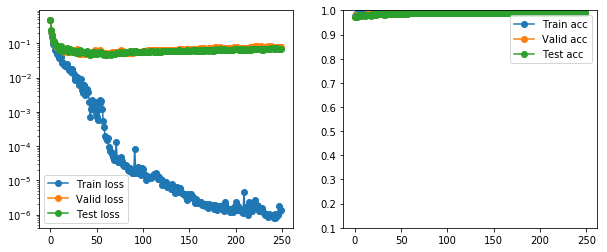

In [12]:
# Save data
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])

Final sparsity fraction:  0.0178807718498


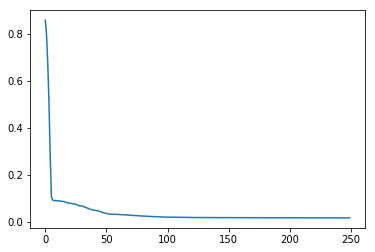

In [13]:
# plot sparsity fracs
plt.plot(sparsity_fracs)
print('Final sparsity fraction: ', sparsity_fracs[-1])